Betweenness Centrality:<br>

Eigenvector Centrality!<br>

$x_i \alpha \sum_{j=1}^n a_{i,j} x_j$<br>

X_i has  importance that is proportional of its neighbors<br>

$x_i =\beta\sum_{j=1}^n a_{i,j} x_j$ for $i =1,2...n$<br>

$x_i = \beta  (Ax^T)_i $<br>
$x^T = \beta Ax^T$<br>
$Ax^T = \lambda x^T$ : Eigenvalue problem<br>

Non-trivial solution:<br>
$(A-\lambda I ) x^T = 0^T$ 
Which gives the Eigenvalues via Lambda, and then X is the eigenvalues. This gets normalized. 

In [2]:
import networkx as nx
import random

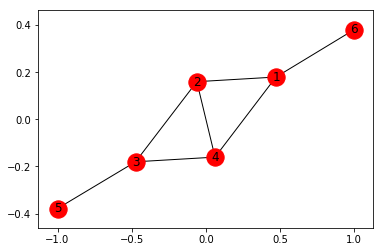

In [4]:
G = nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_edge(1,2)
G.add_edge(1,4)
G.add_edge(2,4)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(3,5)
G.add_edge(1,6)
nx.draw_networkx(G)

In [5]:
G.edges()

EdgeView([(1, 2), (1, 4), (1, 6), (2, 4), (2, 3), (3, 4), (3, 5)])

In [6]:
r_p  = 0.2   # likelihood of spreading illness
v_p  = 0  # likelihood of vaccinating

In [7]:
def initialize_infection(G):
    infected = {}
    healthy  = {}
    n = list(G.nodes())
    for i in n:
        infected[i] = 0
        healthy[i]  = 1
    first =  random.randint(min(n),max(n))
    infected[first] += 1
    healthy[first]  -= 1
    return(infected,healthy)

infected,healthy = initialize_infection(G)

print(healthy)
print(infected)

{1: 1, 2: 1, 3: 1, 4: 0, 5: 1, 6: 1}
{1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0}


In [8]:
def initialize_vaccines(G,v_p):
    vaccinated = {}
    n = list(G.nodes())
    for i in range(min(n),len(n)+1):
        if v_p > random.random():
            vaccinated[i] = 1
        else:
            vaccinated[i] = 0
    return(vaccinated)

vaccinated  = initialize_vaccines(G,v_p)
print(vaccinated)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}


In [9]:
def iterate_epidemic(G,r_p,healthy,infected,vaccinated):
    nodes = list(G.nodes())
    new_infections = []
    for k,v in infected.items():
        if v == 1:
            ne = list(G.neighbors(k))
            for i in ne:
                #print(i)
                if healthy[i] == 1 and vaccinated[i] == 0:
                    if random.random() < r_p:
                        new_infections.append(i)
            infected[k] = 0
    for i in new_infections:
        healthy[i]  = 0
        infected[i] = 1
    return(healthy,infected)


print(infected)
for i in range(10):
    healthy,infected = iterate_epidemic(G,r_p,healthy,infected,vaccinated)
    #print(infected)

{1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0}


In [10]:
r_p  = 1   # likelihood of spreading illness
v_p  = 0  # likelihood of vaccinating

infected,healthy = initialize_infection(G)
vaccinated  = initialize_vaccines(G,v_p)

print('Start')
print('Infected: ',sum(list(infected.values())), 'Healthy: ',sum(list(healthy.values())))
#print(infected)
for i in range(4):
    healthy,infected = iterate_epidemic(G,r_p,healthy,infected,vaccinated)
    print('Infected: ',sum(list(infected.values())), 'Healthy: ',sum(list(healthy.values())))
    #print(infected)

Start
Infected:  1 Healthy:  5
Infected:  3 Healthy:  2
Infected:  1 Healthy:  1
Infected:  1 Healthy:  0
Infected:  0 Healthy:  0


In [201]:
G  = nx.newman_watts_strogatz_graph(100,8,0.5)

r_p  = .25   # likelihood of spreading illness
v_p  = 0.75 # likelihood of vaccinating

infected,healthy = initialize_infection(G)
#print(list(healthy.keys()))
vaccinated  = initialize_vaccines(G,v_p)

#print('Start')
print('Infected: ',sum(list(infected.values())), 'Healthy: ',sum(list(healthy.values())))
#print(infected)
infections = True
while infections  == True:
#for day in range(10):
    healthy,infected = iterate_epidemic(G,r_p,healthy,infected,vaccinated)
    print('Infected: ',sum(list(infected.values())), 'Healthy: ',sum(list(healthy.values())))
    if sum(list(infected.values())) == 0:
        infections = False
    #print(list(healthy.keys()))
    #print(infected)

Infected:  1 Healthy:  99
Infected:  0 Healthy:  99


In [130]:
def draw_graph(G,healthy,vaccinated,infected):
    

1

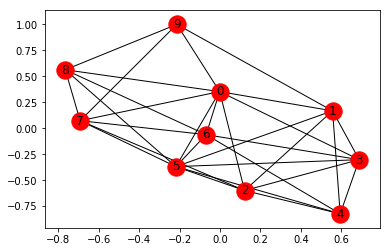

In [78]:
G  = nx.newman_watts_strogatz_graph(10,4,0.5)
nx.draw_networkx(G)